In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from collections import deque
import random
import matplotlib.pyplot as plt
import logging
import time

Load test data

In [ ]:
from Double_DQN_hourly_SSTCV_OP_V_T import load_and_preprocess_data

window_size = 15
initial_balance = 10000 # USD
episodes = 200

# Load test data
data_array, _, scaler = load_and_preprocess_data(window_size=window_size ,filepath='C:\\Andrey\\Kakua_Projets\\Trading\\Bot_RL_v1\\Datasets\\historical_01-01-2019_to_01-01-2025_ETHUSDT.csv',load_scaler=True)

# --- Data splitting test data only ---
train_size = int(0.8 * len(data_array))
test_data = data_array[train_size:]

print(f"\nData division:")
print(f"Total: {len(data_array)}")
print(f"Evaluation: {len(test_data)}")

Scaler saved
Created and saved new scaler

Data division:
Total: 44638
Evaluation: 8928


Create agent and load trained model

In [3]:
from Double_DQN_hourly_SSTCV_OP_V_T import EnhancedDQNAgent, EnhancedTradingEnvironment

# Initial configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test_env = EnhancedTradingEnvironment(test_data, window_size)
state_size = test_env.state_size
action_size = test_env.action_space
save_path = 'best_trading_model.pth'

# Initialize agent
agent = EnhancedDQNAgent(state_size, action_size, device)

# Load model 
agent, best_score,episode, mean_fold_results, std_fold_results, fold_results, train_rewards = agent.load_model(save_path)

✅ Model loaded successfully with hyperparameters:
γ=0.95, lr=0.0001, batch=32
| ε: 0.0499 | Average Fold results: 89.84% | Best Score: -inf% |


In [4]:
print("\nLoaded Hyperparameters:")
print(f"• Learning rate (lr): {agent.hyperparams['lr']}")
print(f"• Discount factor (gamma): {agent.hyperparams['gamma']}")
print(f"• Batch size: {agent.hyperparams['batch_size']}")
print(f"• Current epsilon: {agent.epsilon}")



Loaded Hyperparameters:
• Learning rate (lr): 0.0001
• Discount factor (gamma): 0.95
• Batch size: 32
• Current epsilon: 0.04993675381238609


In [5]:
from Double_DQN_hourly_SSTCV_OP_V_T import evaluate

# --- Final Evaluation ---
print("\nEvaluating on test set...")
test_return, portfolio_history, price_history, actions_history = evaluate(
    agent, test_env, scaler, initial_balance
)


Evaluating on test set...


Metricas

In [6]:
from Double_DQN_hourly_SSTCV_OP_V_T import metrics

# Final results and metrics
metrics(portfolio_history, test_return, price_history, actions_history, initial_balance, mean_fold_results, std_fold_results)


--- Final Results ---
CV Performance: 89.84% ± 150.13
Initial Value: $10,000.00
Final Value: $20,656.75
Test Performance (%): 106.57%
Buy & Hold Return: 51.16%
Sharpe Ratio: 0.43
Max Drawdown: $2,747.76 (27.48%)
Actions: Buy=2.0%, Sell=8.5%, Hold=89.5%


Gráficos

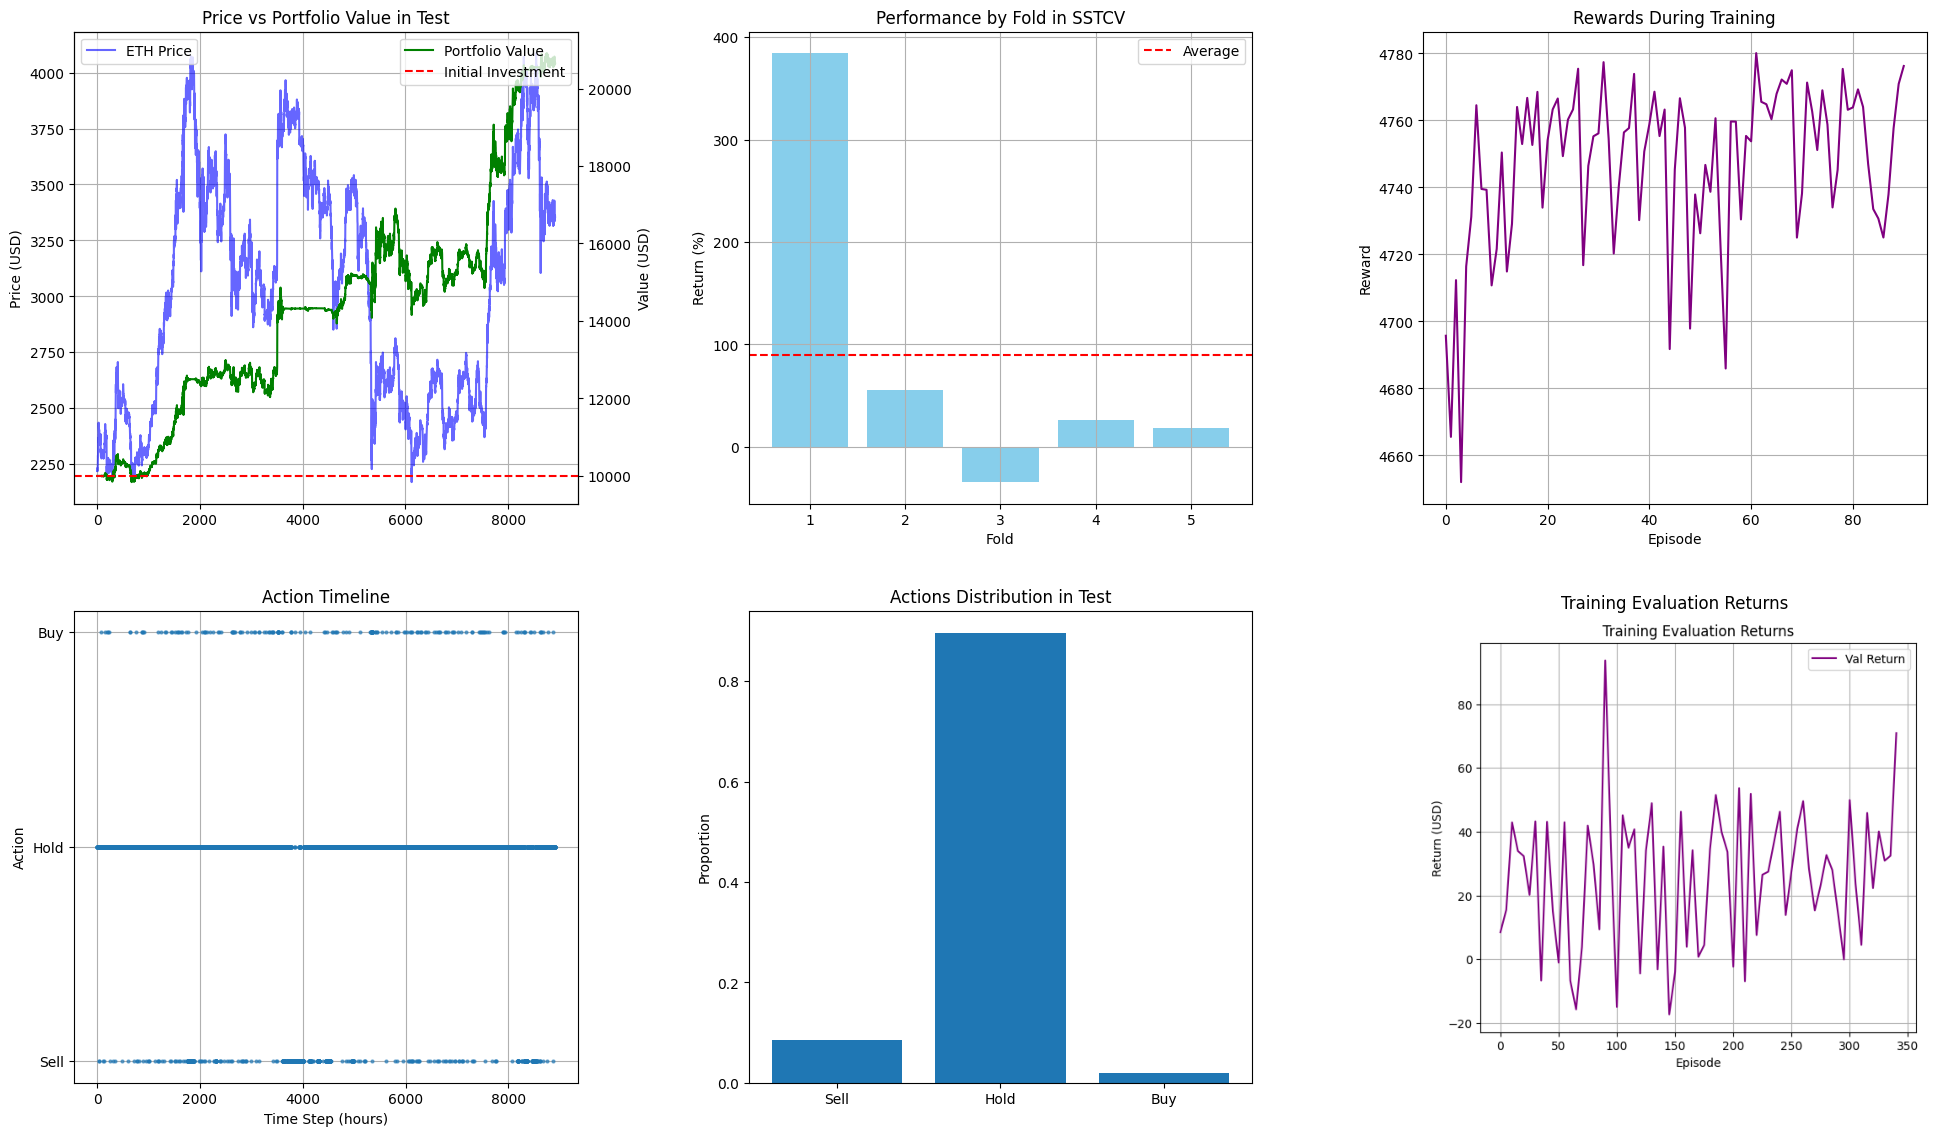

In [8]:
from Double_DQN_hourly_SSTCV_OP_V_T import plot_results

# Results visualization
test_results = {
        'final_return': test_return,
        'portfolio_history': portfolio_history,
        'price_history': price_history,
        'actions_dist': pd.Series(actions_history).value_counts(normalize=True).to_dict()
    }

plot_results(
    fold_results=fold_results,  
    train_rewards=train_rewards,
    initial_balance=initial_balance,
    actions_history=actions_history,
    test_results=test_results
)